In [4]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s


#consumer key, consumer secret, access token, access secret.
consumer_key ="Consumer_Key"
consumer_secret="Consumer_Secret"
access_token="Access_Token"
access_token_secret="Acces_Token_Secret

class listen_data(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)
        try:
            tweet = all_data['text']
            sentiment, confidence = s.sentiment(tweet.lower())
            print(tweet, sentiment, confidence)
            if confidence*100 >= 75:
                output_file = open('Tweet_Sentiments.txt','a')
                output_file.write(sentiment)
                output_file.write('\n')
                output_file.close()
            return True
        except:
            return True
    def on_error(self, status):
        print(status)

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

twitter_data_stream = Stream(auth,listen_data())
twitter_data_stream.filter(track=['Apple'])


@sujoydhar2016 shared Apple patches Stagefright-like vulnerability on iOS, OS X - https://t.co/IckIOLr2mj https://t.co/812I7VTn6N pos 1.0
Apple Watch 2 Case,Misxi iphone Watch 2 PC Hard Screen Protector Ultra Thin All-around Cover For New i Watch… https://t.co/gop0DPKkFL neg 1.0
Cinque indagini romane per Rocco Schiavone. Non mancate! #Libri #iTunes #Italia  https://t.co/EOXifpxWtL neg 1.0
Apple patches Stagefright-like vulnerability on iOS, OS X - https://t.co/L1Sd260jOW @sujoydhar2016 Tweet it ! https://t.co/butjj62VzW neg 0.6666666666666666
Comey Asks Justice Dept. to Reject Trump’s Wiretapping Claim - The New York Times https://t.co/dHnPHlyZY3 neg 1.0
RT @UnderTheLoupe: Approaching the pinnacle of material science https://t.co/sw87y65Rci @ReneRitchie spends some quality time with the Appl… pos 0.8333333333333334
Appleが見捨てたI/O規格の数々を1枚の図にするとこうなる https://t.co/xod3Pg9kK0 neg 1.0
Guy Found A Way To Light The APPLE &gt;&gt; https://t.co/NLeuEgpmcq neg 1.0
RT @shanselman: "Zelda: Breath o

KeyboardInterrupt: 

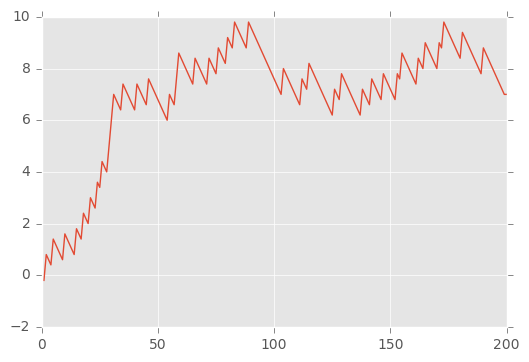

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(object):
    tweetData = open('Tweet_Sentiments.txt','r').read()
    lines = tweetData.split('\n')
    xarr = []
    yarr = []
    x = 0
    y = 0
    for l in lines[-200:]:
        x += 1
        if 'pos' in l:
            y += 1
        elif 'neg' in l:
            y -= 0.2
        xarr.append(x)
        yarr.append(y)
    ax1.clear()
    ax1.plot(xarr, yarr)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()